<a href="https://colab.research.google.com/github/roydendsouza31/AI-Generated-Images-vs-Real-Images/blob/A1/Copy_of_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI Generated Images vs Real Images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install kaggle

import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

!kaggle datasets download -d birdy654/cifake-real-and-ai-generated-synthetic-images

import zipfile

# Define the path to your zip file
file_path = '/content/cifake-real-and-ai-generated-synthetic-images.zip'  # Replace 'your_file.zip' with your file's name

!mkdir CIFAKE

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/CIFAKE')  # Replace 'destination_folder' with your desired folder

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cifake-real-and-ai-generated-synthetic-images.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘CIFAKE’: File exists


In [ ]:
dataset_dir = "/content/CIFAKE" # For Kaggle notebooks. If you run locally, point this line to the CIFAKE directory
print("Loading dataset from: " + dataset_dir)

Loading dataset from: /content/CIFAKE


In [ ]:
# Import all of the data using dataset from directory
# If there isn't enough RAM available, consider using Tensorflow Datasets

import tensorflow as tf

img_height = 32 # The dataset is all 32px but this is here just to make sure
img_width = 32
batch_size = 32

# Load the training data
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir + "/train",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Load the validation data
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir + "/test",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=32)

# Quick sanity check to make sure it's all loaded properly
print("Training Classes:")
class_names = train_ds.class_names
print(class_names)

print("Testing Classes:")
class_names = train_ds.class_names
print(class_names)

Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.
Training Classes:
['FAKE', 'REAL']
Testing Classes:
['FAKE', 'REAL']


Displaying images from the training dataset:


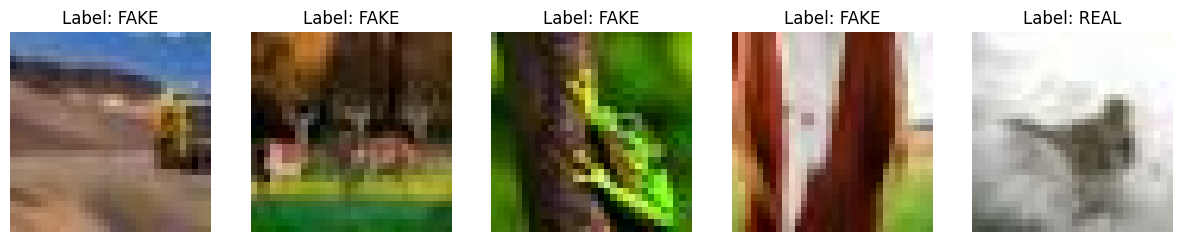

Displaying images from the validation dataset:


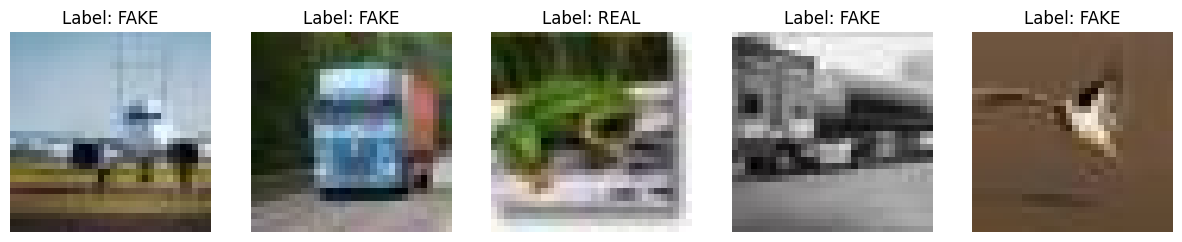

In [ ]:
import matplotlib.pyplot as plt

# Function to display images from a TensorFlow dataset
def display_images(dataset, class_names, num_images=5):
    plt.figure(figsize=(15, 3))
    for images, labels in dataset.take(1):
        for i in range(min(num_images, len(images))):
            plt.subplot(1, num_images, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(f"Label: {class_names[labels[i]]}")
            plt.axis("off")
    plt.show()

# Displaying images from the training dataset
print("Displaying images from the training dataset:")
display_images(train_ds, class_names)

# Displaying images from the validation dataset
print("Displaying images from the validation dataset:")
display_images(val_ds, class_names)


In [ ]:
# Building the CNN
layers = []
layers.append(tf.keras.layers.Rescaling(1./255)) # Normalise pixel values
layers.append(tf.keras.layers.Conv2D(32, 3, activation='relu'))
layers.append(tf.keras.layers.MaxPooling2D())
layers.append(tf.keras.layers.Flatten())

# Building the ANN
layers.append(tf.keras.layers.Dense(64, activation='relu'))
layers.append(tf.keras.layers.Dense(1, activation='sigmoid'))

# Create and compile the model from layers
model = tf.keras.Sequential(layers)
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.BinaryCrossentropy(),
  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Build the model so we can see a summary
model.build(input_shape=(None, 32, 32, 3))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 7200)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                460864    
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                      

In [ ]:
# Check if GPUs are available for training
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
# Finally, train the model

print("Starting training...")
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5,
  verbose=1
)

!mkdir TrainedModelSave
model.save("/content/TrainedModelSavenew") # Saving the model

print("Training finished.")

Starting training...
Epoch 1/5
3125/3125 [==============================] - 23s 7ms/step - loss: 0.3243 - accuracy: 0.8590 - precision_2: 0.8526 - recall_2: 0.8681 - val_loss: 0.2759 - val_accuracy: 0.8896 - val_precision_2: 0.9287 - val_recall_2: 0.8440
Epoch 2/5
3125/3125 [==============================] - 22s 7ms/step - loss: 0.2191 - accuracy: 0.9117 - precision_2: 0.9085 - recall_2: 0.9155 - val_loss: 0.1998 - val_accuracy: 0.9211 - val_precision_2: 0.9178 - val_recall_2: 0.9249
Epoch 3/5
3125/3125 [==============================] - 24s 8ms/step - loss: 0.1860 - accuracy: 0.9254 - precision_2: 0.9228 - recall_2: 0.9284 - val_loss: 0.1971 - val_accuracy: 0.9222 - val_precision_2: 0.9465 - val_recall_2: 0.8951
Epoch 4/5
3125/3125 [==============================] - 22s 7ms/step - loss: 0.1614 - accuracy: 0.9362 - precision_2: 0.9340 - recall_2: 0.9388 - val_loss: 0.1957 - val_accuracy: 0.9255 - val_precision_2: 0.9452 - val_recall_2: 0.9034
Epoch 5/5
3125/3125 [======================

In [ ]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model("/content/TrainedModelSavenew")

# Classify the test data
predictions = model.predict(val_ds)

import numpy as np

# Convert the predictions to class names
class_names = val_ds.class_names
predicted_classes = [class_names[int(np.round(prediction))] for prediction in predictions]

# Display the predictions
for image_batch, labels_batch in val_ds:
    for i in range(len(labels_batch)):
        print(f"Predicted class: {predicted_classes[i]}, True class: {class_names[int(labels_batch[i])]}")





625/625 [==============================] - 2s 3ms/step


<ipython-input-10-84f82a264d24>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_classes = [class_names[int(np.round(prediction))] for prediction in predictions]


Streaming output truncated to the last 5000 lines.
Predicted class: REAL, True class: FAKE
Predicted class: REAL, True class: REAL
Predicted class: FAKE, True class: REAL
Predicted class: REAL, True class: FAKE
Predicted class: REAL, True class: REAL
Predicted class: REAL, True class: REAL
Predicted class: REAL, True class: FAKE
Predicted class: REAL, True class: FAKE
Predicted class: REAL, True class: REAL
Predicted class: REAL, True class: FAKE
Predicted class: FAKE, True class: REAL
Predicted class: REAL, True class: REAL
Predicted class: REAL, True class: FAKE
Predicted class: FAKE, True class: REAL
Predicted class: REAL, True class: FAKE
Predicted class: REAL, True class: REAL
Predicted class: FAKE, True class: FAKE
Predicted class: REAL, True class: FAKE
Predicted class: FAKE, True class: REAL
Predicted class: FAKE, True class: REAL
Predicted class: REAL, True class: FAKE
Predicted class: FAKE, True class: FAKE
Predicted class: REAL, True class: REAL
Predicted class: FAKE, True c

625/625 [==============================] - 3s 4ms/step - loss: 0.1872 - accuracy: 0.9299 - precision_2: 0.9294 - recall_2: 0.9306
Test Loss: 0.18716378509998322, Test Accuracy: 0.9299499988555908, Test Precision: 0.9293918013572693, Test Recall: 0.9305999875068665
1/1 [==============================] - 0s 57ms/step


<ipython-input-30-9c54bdf16be9>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_classes = [class_names[int(np.round(prediction))] for prediction in predictions]


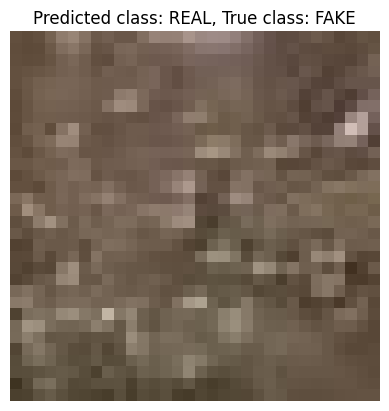

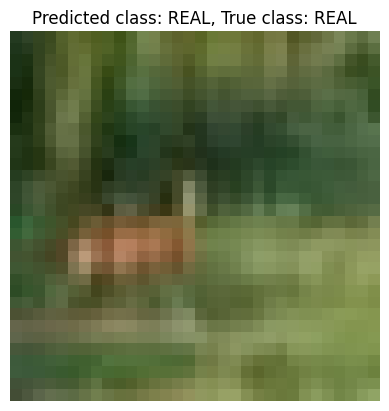

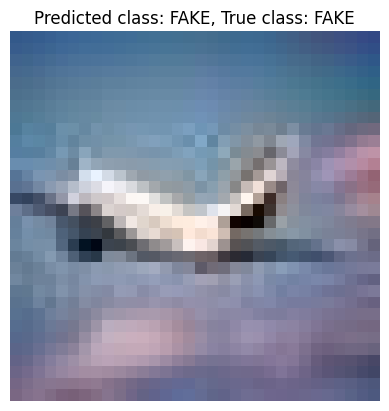

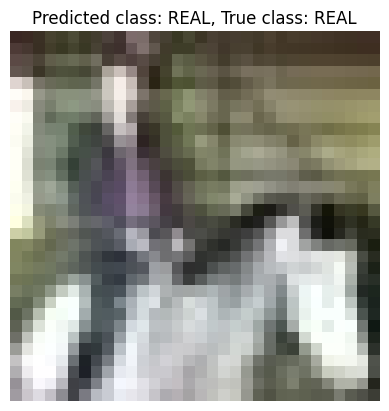

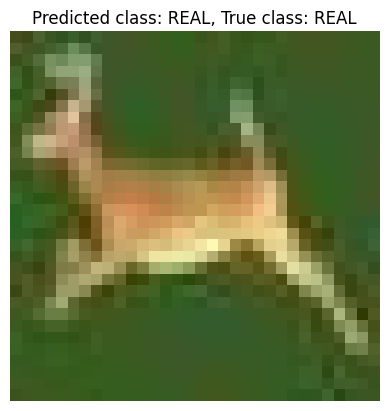

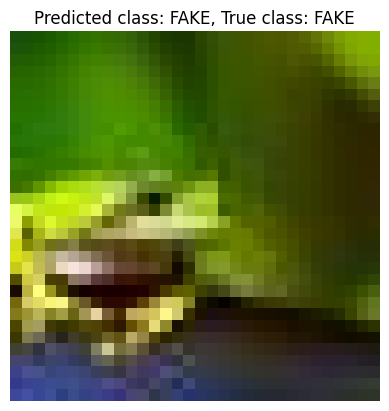

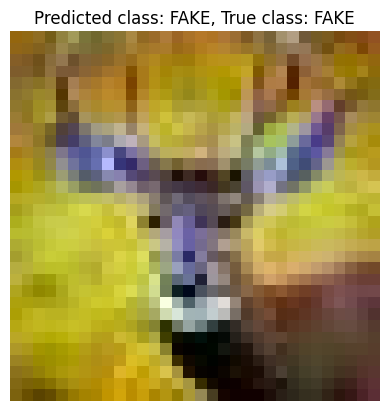

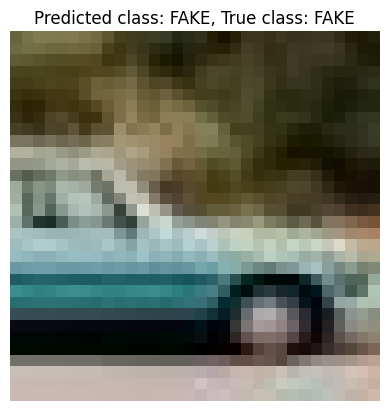

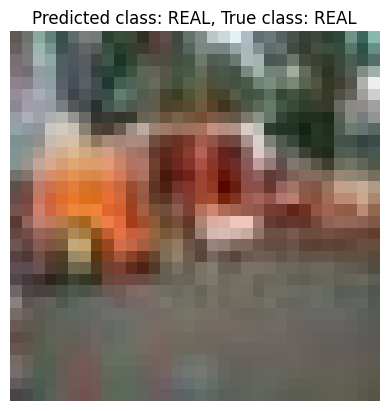

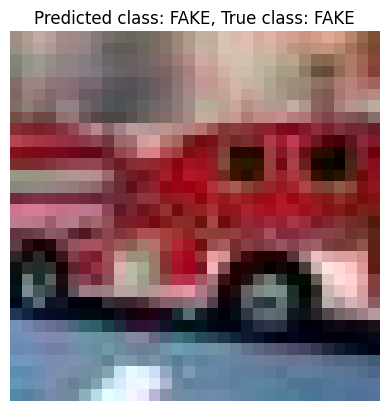

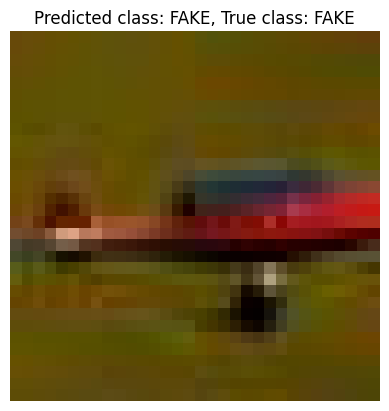

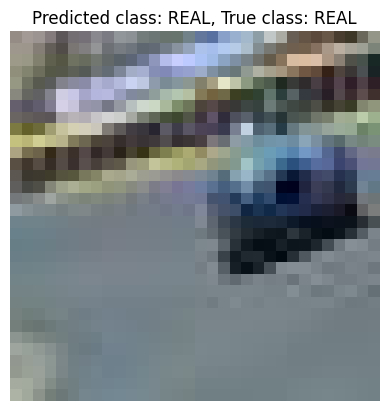

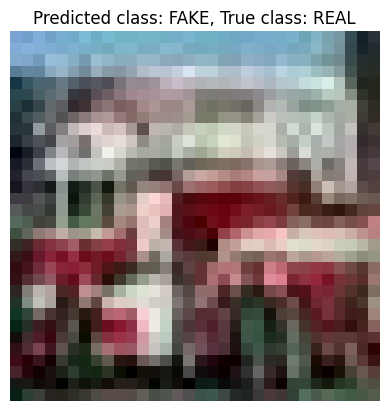

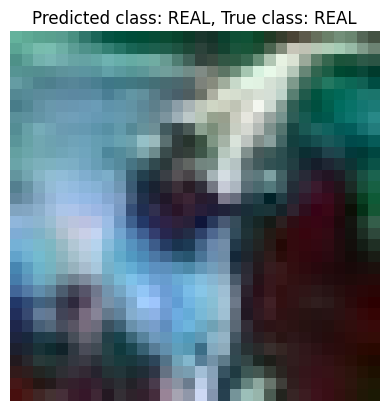

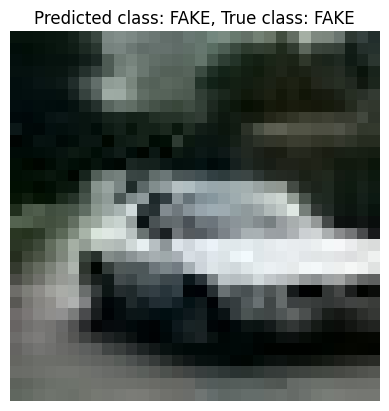

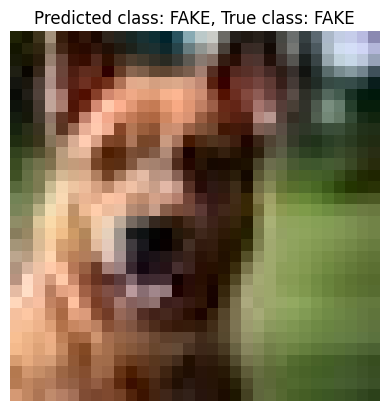

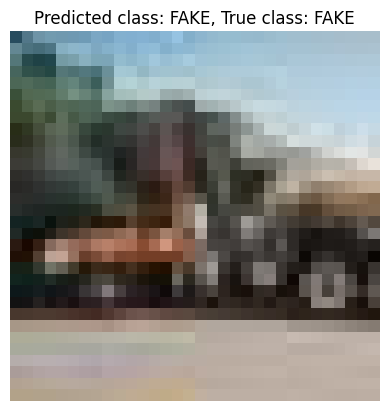

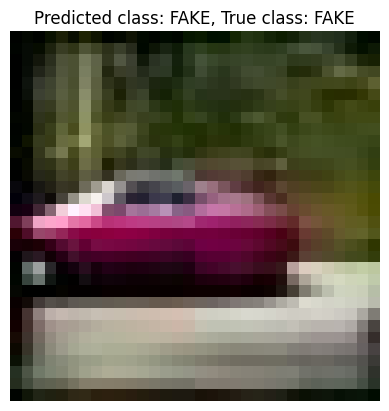

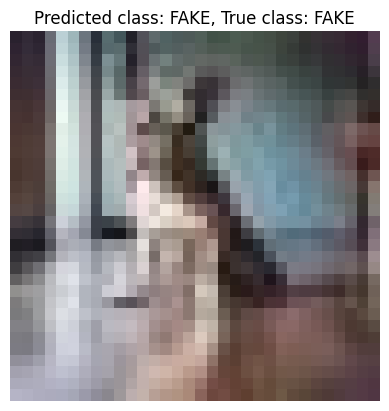

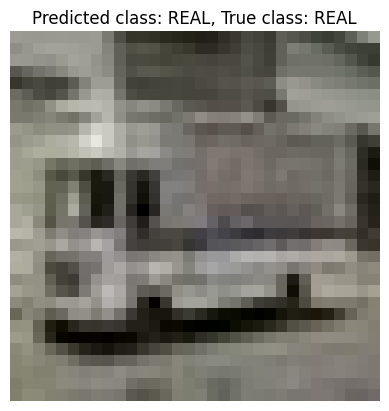

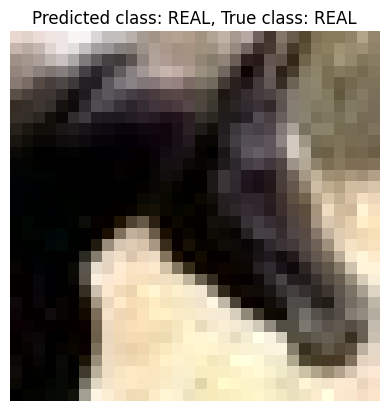

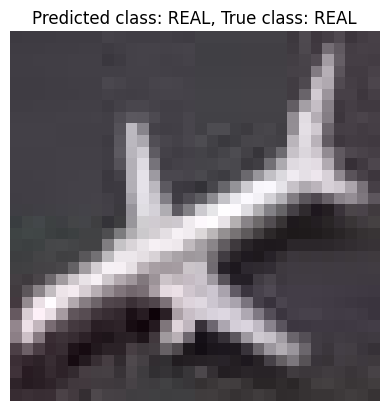

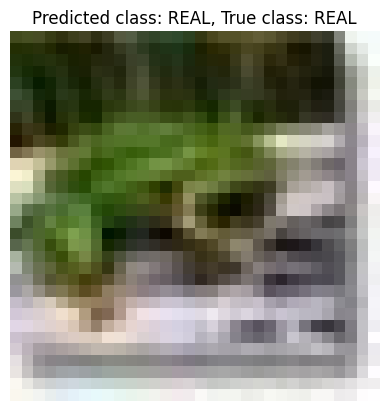

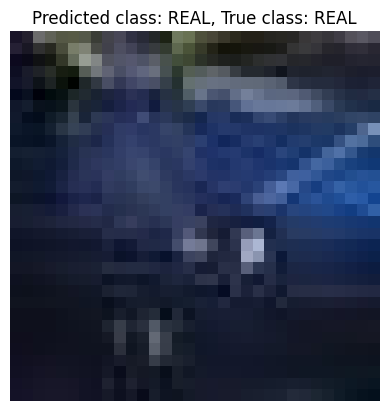

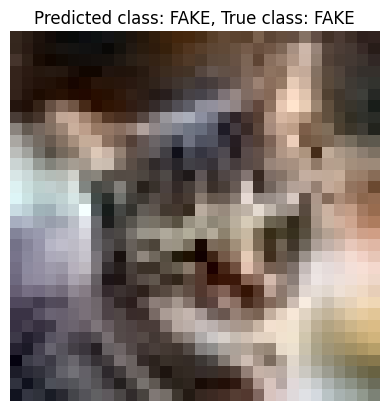

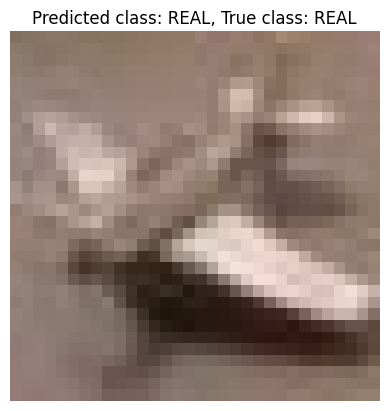

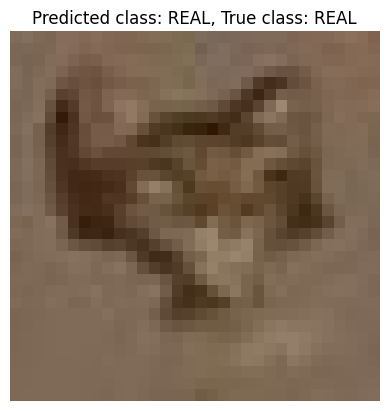

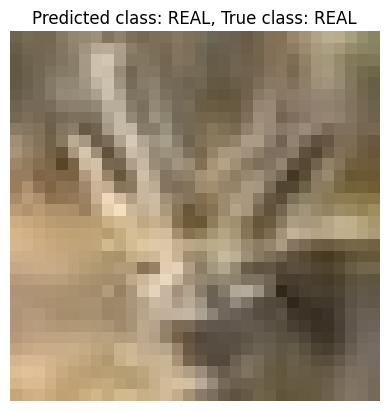

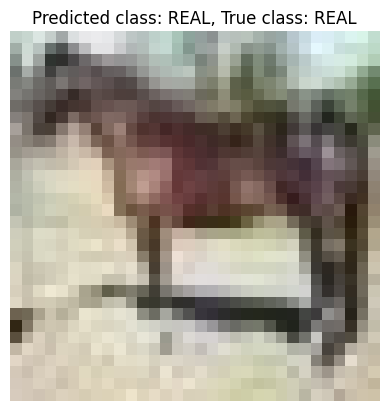

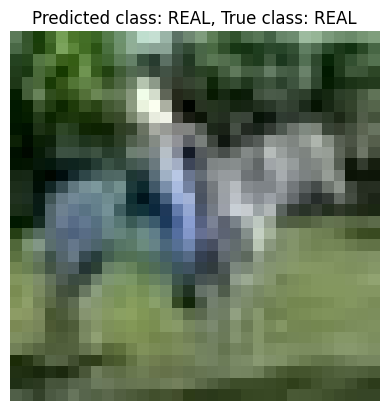

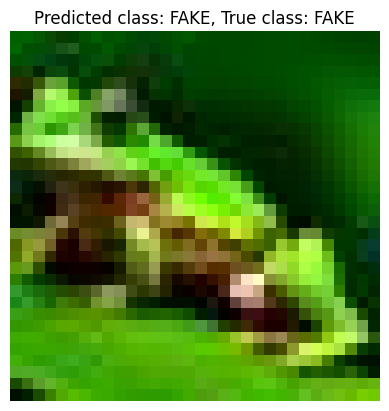

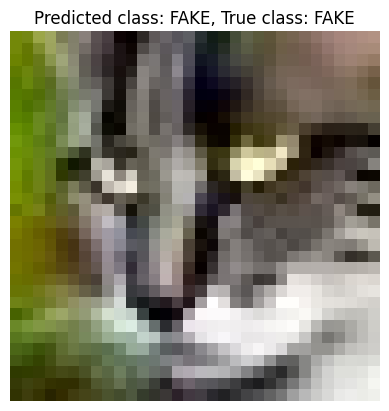

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model("/content/TrainedModelSavenew")

# Evaluate the model
test_loss, test_acc, test_precision, test_recall = model.evaluate(val_ds)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}, Test Precision: {test_precision}, Test Recall: {test_recall}")


# Get the class names from the test data
class_names = val_ds.class_names

# Get a batch of test images and their labels
for images, labels in val_ds.take(1):
    # Classify the images
    predictions = model.predict(images)
    predicted_classes = [class_names[int(np.round(prediction))] for prediction in predictions]

    # Display the images along with their predicted and true classes
    for i in range(len(images)):
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Predicted class: {predicted_classes[i]}, True class: {class_names[int(labels[i])]}")
        plt.axis("off")
        plt.show()
